In [ ]:
#import pandas as pd
#df_final=pd.read_csv("/content/synthetic_dataset_2000_samples.csv")
#df_final.head()

#mean_value = df_final['WaterContent_mm'][df_final['WaterContent_mm'] >= 0].mean()
#df_final['WaterContent_mm'] = df_final['WaterContent_mm'].apply(lambda x: x if x >= 0 else 0)

#mean_value = df_final['WaterRequired_mm'][df_final['WaterRequired_mm'] >= 0].mean()
#df_final['WaterRequired_mm'] = df_final['WaterRequired_mm'].apply(lambda x: x if x >= 0 else 0)

#mean_value = df_final['Precipitation_mm'][df_final['Precipitation_mm'] >= 0].mean()
#df_final['Precipitation_mm'] = df_final['Precipitation_mm'].apply(lambda x: x if x >= 0 else 0)

#mean_value = df_final['TimeToZero_hrs'][df_final['TimeToZero_hrs'] >= 0].mean()
#df_final['TimeToZero_hrs'] = df_final['TimeToZero_hrs'].apply(lambda x: x if x >= 0 else 0)

#def normalize_and_scale(data):
    # Normalize the data
 #   normalized_data = (data - min(data)) / (max(data) - min(data))

    # Scale the normalized values to the range 0-10
 #   scaled_values = 10 * normalized_data

 #   return scaled_values

 #water_content = df_final['WaterContent_mm']
#water_required = df_final['WaterRequired_mm']

# Apply the function to the relevant columns
#scaled_water_content = normalize_and_scale(water_content)
#scaled_water_required = normalize_and_scale(water_required)

# Apply the function to the relevant columns
#df_final['WaterContent_mm'] = normalize_and_scale(scaled_water_content)
#df_final['WaterRequired_mm'] = normalize_and_scale(scaled_water_required )

#df_final = df_final.drop('Date', axis=1)
#df_final.head(20)


#def calculate_time_to_zero(WaterContent_mm, WaterRequired_mm, Temperature_C, Humidity_%, Precipitation_mm	):
    # Simplified evapotranspiration calculation (for demonstration purposes)
#    evapotranspiration = (0.408 * (Temperature_C + 273) + 0.34 * Humidity_%) / (Temperature_C + 273)
#    TimeToZero_hrs = (WaterContent_mm + Precipitation_mm - WaterRequired_mm) / evapotranspiration
#    return max(TimeToZero_hrs, 0)  # Ensure non-negative time

#    for i in range(num_tuples):
#    WaterContent_mm = base_water_content[i] + random.uniform(-5, 5)
#    WaterRequired_mm = base_water_required[i] + random.uniform(-2, 2)
#    Temperature_C = base_temperature[i] + random.uniform(-3, 3)
#    humidity = base_humidity[i] + random.uniform(-5, 5)
#    precipitation = base_precipitation[i] + random.uniform(-2, 2)
#    time_to_zero = calculate_time_to_zero(WaterContent_mm, water_required, temperature, humidity, precipitation)

#    data.append([WaterContent_mm, WaterRequired_mm, Temperature_C, humidity, precipitation, time_to_zero])

In [ ]:
import numpy as np
import pandas as pd

# Function to calculate TimeToZero_hrs using the provided formula
def calculate_time_to_zero(WaterContent_mm, WaterRequired_mm, Temperature_C, Humidity, Precipitation_mm):
    # Simplified evapotranspiration calculation (for demonstration purposes)
    evapotranspiration = (0.408 * (Temperature_C + 273) + 0.34 * Humidity) / (Temperature_C + 273)
    TimeToZero_hrs = (WaterContent_mm + Precipitation_mm - WaterRequired_mm) / evapotranspiration
    return np.maximum(TimeToZero_hrs, 0)  # Ensure non-negative time

# Set random seed for reproducibility
np.random.seed(42)

# Generate 2000 samples for each column with high correlation
n_samples = 2000

# Start by generating one feature randomly, and use it to generate other features with a correlation >= 0.8
WaterContent_mm = np.random.uniform(0.5, 10, n_samples)

# Create other features with high correlation to WaterContent_mm
WaterRequired_mm = WaterContent_mm + np.random.normal(0, 0.5, n_samples)  # Small noise fo  r variation
Temperature_C = WaterContent_mm * 3 + np.random.normal(0, 5, n_samples)
Humidity = WaterContent_mm * 8 + np.random.normal(0, 10, n_samples)
Precipitation_mm = WaterContent_mm + np.random.normal(0, 1, n_samples)

# Calculate TimeToZero_hrs using the provided formula
TimeToZero_hrs = calculate_time_to_zero(WaterContent_mm, WaterRequired_mm, Temperature_C, Humidity, Precipitation_mm)

# Create a DataFrame
data = pd.DataFrame({
    'WaterContent_mm': WaterContent_mm,
    'WaterRequired_mm': WaterRequired_mm,
    'Temperature_C': Temperature_C,
    'Humidity_%': Humidity,
    'Precipitation_mm': Precipitation_mm,
    'TimeToZero_hrs': TimeToZero_hrs
})

# Save the DataFrame as a CSV file
csv_file_path = 'synthetic_water_data.csv'
data.to_csv(csv_file_path, index=False)

print(f"Dataset saved to {csv_file_path}")

Dataset saved to synthetic_water_data.csv


In [ ]:
import pandas as pd
df_final=pd.read_csv("/content/synthetic_water_data.csv")
df_final.head(50)

,WaterContent_mm,WaterRequired_mm,Temperature_C,Humidity_%,Precipitation_mm,TimeToZero_hrs
0,4.058131,3.619140,13.907943,30.738758,2.532559,6.686252
1,9.531786,9.118346,41.153140,82.641059,8.377623,17.672598
2,7.453942,7.340703,13.161439,58.995804,8.309144,17.616537
3,6.187256,6.370938,18.400364,34.988766,6.451546,13.965074
4,1.982177,2.438969,9.149246,16.613180,3.295959,6.633266
5,1.981948,1.580358,6.561235,26.344225,1.966476,5.381483
6,1.051794,1.798139,2.589743,8.122190,0.183819,0.000000
7,8.728673,8.593112,19.689938,77.580538,8.515080,17.366562
8,6.210593,6.199909,19.795712,39.229446,4.677909,10.337451
9,7.226689,6.853084,17.896249,57.550908,6.098099,13.617028


In [ ]:
import pandas as pd

crop_data = {
    "Crop": [
        "Maize", "Maize", "Maize", "Maize", "Maize",
        "Tomato", "Tomato", "Tomato", "Tomato", "Tomato",
        "Onion", "Onion", "Onion", "Onion", "Onion",
        "Strawberry", "Strawberry", "Strawberry", "Strawberry", "Strawberry",
        "Groundnut", "Groundnut", "Groundnut", "Groundnut", "Groundnut",
        "Cotton", "Cotton", "Cotton", "Cotton", "Cotton",
    ],
    "Growth Phase": [
        "Germination", "Vegetative growth", "Elongation", "Flowering", "Harvesting",
        "Germination", "Vegetative growth", "Elongation", "Flowering", "Harvesting",
        "Germination", "Vegetative growth", "Elongation", "Flowering", "Harvesting",
        "Germination", "Vegetative growth", "Elongation", "Flowering", "Harvesting",
        "Germination", "Vegetative growth", "Elongation", "Flowering", "Harvesting",
        "Germination", "Vegetative growth", "Elongation", "Flowering", "Harvesting",
    ],
    "Water Requirement (mm/day)": [
        1.20, 1.30, 4.90, 6.10, 2.00,
        0.45, 6.02, 4.18, 1.03, 0.65,
        0.50, 0.75, 1.00, 0.87, 0.80,
        3.62, 3.57, 5.44, 5.44, 6.28,
        3.00, 4.50, 5.50, 6.00, 4.00,
        2.00, 3.50, 5.00, 6.50, 4.00,
    ]
}

df2 = pd.DataFrame(crop_data)
df2.head(30)

,Crop,Growth Phase,Water Requirement (mm/day)
0,Maize,Germination,1.20
1,Maize,Vegetative growth,1.30
2,Maize,Elongation,4.90
3,Maize,Flowering,6.10
4,Maize,Harvesting,2.00
5,Tomato,Germination,0.45
6,Tomato,Vegetative growth,6.02
7,Tomato,Elongation,4.18
8,Tomato,Flowering,1.03
9,Tomato,Harvesting,0.65


In [ ]:
# User input
string1 = input('Enter the name of the plant you are growing in the field: ').strip()
string2 = input('Enter the phase of the plant you are growing in the field: ').strip()

Irrigation_Water_Requirement = None

print(f"User entered: {string1}")

for index, row in df2.iterrows():
    print(f"Checking: {row['Crop']} {row['Growth Phase']}")

    if row['Crop'] == string1 and row['Growth Phase'] == string2:
        Irrigation_Water_Requirement = row['Water Requirement (mm/day)']
        break

if Irrigation_Water_Requirement is not None:
    print(f"Irrigation Water Requirement for {string1} in Phase {string2}: {Irrigation_Water_Requirement} mm/day")
else:
    print(f"Plant {string1} in Phase {string2} not found in the dataset.")

Enter the name of the plant you are growing in the field: Maize
Enter the phase of the plant you are growing in the field: Germination
User entered: Maize
Checking: Maize Germination
Irrigation Water Requirement for Maize in Phase Germination: 1.2 mm/day


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore


numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

# Detect and remove outliers in numerical columns using Z-score
df_final_numerical = df_final[numerical_cols]
df_final_numerical_zscores = df_final_numerical.apply(zscore)

# Filter out rows where any numerical feature has a Z-score greater than 3 or less than -3
df_final_numerical_no_outliers = df_final_numerical[(np.abs(df_final_numerical_zscores) < 3).all(axis=1)]

# Recombine with the original categorical columns
df_final = df_final_numerical_no_outliers.join(df_final[categorical_cols])

# Feature columns and target column
features = ['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']
target = 'TimeToZero_hrs'

# Prepare input features (X) and target variable (y)
X = df_final[features]
y = df_final[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

def predict_remaining_time(water_content, water_required, temperature, humidity, precipitation):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'WaterContent_mm': [water_content],
        'WaterRequired_mm': [water_required],
        'Temperature_C': [temperature],
        'Humidity_%': [humidity],
        'Precipitation_mm': [precipitation]
    })

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the remaining time
    remaining_time = model.predict(input_data_scaled)
    return remaining_time[0]

# Example prediction
remaining_time = predict_remaining_time(8, Irrigation_Water_Requirement, 25, 60, 0)
print(f"Predicted Remaining Time in Irrigation Cycle: {remaining_time} hours")


if remaining_time<4 :
    print('Irrigate now')
elif 4<remaining_time<6 :
    print('Irrigate after 6 hours')
else :
    print('No need to irrigate right now')


Mean Squared Error: 0.5355080111845518
R^2 Score: 0.9848479854620327
Predicted Remaining Time in Irrigation Cycle: 0.331491616750679 hours
Irrigate now


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore

numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

# Detect and remove outliers in numerical columns using Z-score
df_final_numerical = df_final[numerical_cols]
df_final_numerical_zscores = df_final_numerical.apply(zscore)

# Filter out rows where any numerical feature has a Z-score greater than 3 or less than -3
df_final_numerical_no_outliers = df_final_numerical[(np.abs(df_final_numerical_zscores) < 3).all(axis=1)]

# Recombine with the original categorical columns
df_final = df_final_numerical_no_outliers.join(df_final[categorical_cols])


# Feature columns and target column
features = ['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']
target = 'TimeToZero_hrs'

# Prepare input features (X) and target variable (y)
X = df_final[features]
y = df_final[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

def predict_remaining_time(water_content, water_required, temperature, humidity, precipitation):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'WaterContent_mm': [water_content],
        'WaterRequired_mm': [water_required],
        'Temperature_C': [temperature],
        'Humidity_%': [humidity],
        'Precipitation_mm': [precipitation]
    })

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the remaining time
    remaining_time = model.predict(input_data_scaled)
    return remaining_time[0]

# Example prediction
remaining_time = predict_remaining_time(8.16, Irrigation_Water_Requirement, 24, 60, 0)
print(f"Predicted Remaining Time in Irrigation Cycle: {remaining_time} hours")


if remaining_time<4 :
    print('Irrigate now')
elif 4<remaining_time<6 :
    print('Irrigate after 6 hours')
else :
    print('No need to irrigate right now')

Mean Squared Error: 0.2024800930524008
R^2 Score: 0.9942708955804554
Predicted Remaining Time in Irrigation Cycle: 14.579052524989446 hours
No need to irrigate right now


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
# Remove the 'Date' column if it exists
if 'Date' in df_final.columns:
    df_final = df_final.drop('Date', axis=1)

# Features and Target
X = df_final.drop(['TimeToZero_hrs'], axis=1)
y = df_final['TimeToZero_hrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'\nModel: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')

    # Print actual vs predicted values
    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("\nComparison of Actual vs Predicted TimeToZero_hrs:")
    print(comparison.head())

# Function to take input from the user and predict time remaining for the best model
def predict_time_remaining(model):
    print("\nEnter the values for prediction:")
    WaterContent_mm = float(input("WaterContent_mm: "))
    WaterRequired_mm = float(input("WaterRequired_mm: "))
    Temperature_C = float(input("Temperature_C: "))
    Humidity_percent = float(input("Humidity_%: "))
    Precipitation_mm = float(input("Precipitation_mm: "))

    # Prepare the input data in the same format as the training data
    input_data = pd.DataFrame({
        'WaterContent_mm': [WaterContent_mm],
        'WaterRequired_mm': [WaterRequired_mm],
        'Temperature_C': [Temperature_C],
        'Humidity_%': [Humidity_percent],
        'Precipitation_mm': [Precipitation_mm]
    })

    # Predict the time remaining
    prediction = model.predict(input_data)
    print(f"\nPredicted TimeToZero_hrs: {prediction[0]:.2f}")

# Choose the best model based on R² score and predict time remaining based on user input
best_model = max(models.items(), key=lambda item: r2_score(y_test, item[1].predict(X_test)))[1]
predict_time_remaining(best_model)




Model: Linear Regression
Mean Absolute Error (MAE): 0.27
Root Mean Squared Error (RMSE): 0.45
R-squared (R²): 0.99

Comparison of Actual vs Predicted TimeToZero_hrs:
         Actual  Predicted
1860  15.545872  15.494814
353    4.140859   4.440183
1333  21.768034  22.160084
905   17.667931  18.040485
1289   6.591831   6.734617

Model: Decision Tree Regressor
Mean Absolute Error (MAE): 0.78
Root Mean Squared Error (RMSE): 0.99
R-squared (R²): 0.97

Comparison of Actual vs Predicted TimeToZero_hrs:
         Actual  Predicted
1860  15.545872  16.308210
353    4.140859   4.241455
1333  21.768034  21.176054
905   17.667931  18.887037
1289   6.591831   4.284675

Model: Random Forest Regressor
Mean Absolute Error (MAE): 0.54
Root Mean Squared Error (RMSE): 0.73
R-squared (R²): 0.98

Comparison of Actual vs Predicted TimeToZero_hrs:
         Actual  Predicted
1860  15.545872  16.937759
353    4.140859   4.245364
1333  21.768034  21.166228
905   17.667931  18.233848
1289   6.591831   5.132182



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore

numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

# Detect and remove outliers in numerical columns using Z-score
df_final_numerical = df_final[numerical_cols]
df_final_numerical_zscores = df_final_numerical.apply(zscore)

# Filter out rows where any numerical feature has a Z-score greater than 3 or less than -3
df_final_numerical_no_outliers = df_final_numerical[(np.abs(df_final_numerical_zscores) < 3).all(axis=1)]

# Recombine with the original categorical columns
df_final = df_final_numerical_no_outliers.join(df_final[categorical_cols])


# Remove the 'Date' column if it exists
if 'Date' in df_final.columns:
    df_final = df_final.drop('Date', axis=1)

# Features and Target
X = df_final.drop(['TimeToZero_hrs'], axis=1)
y = df_final['TimeToZero_hrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Evaluate and print models with R² score > 0.5
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)

    if r2 > 0.2:
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        # Print evaluation metrics
        print(f'\nModel: {model_name}')
        print(f'Mean Absolute Error (MAE): {mae:.2f}')
        print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'R-squared (R²): {r2:.2f}')

        # Print actual vs predicted values
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        print("\nComparison of Actual vs Predicted TimeToZero_hrs:")
        print(comparison.head())

# Function to take input from the user and predict time remaining for the best model
def predict_time_remaining(model):
    print("\nEnter the values for prediction:")
    WaterContent_mm = float(input("WaterContent_mm: "))
    WaterRequired_mm = float(input("WaterRequired_mm: "))
    Temperature_C = float(input("Temperature_C: "))
    Humidity_percent = float(input("Humidity_%: "))
    Precipitation_mm = float(input("Precipitation_mm: "))

    # Prepare the input data in the same format as the training data
    input_data = pd.DataFrame({
        'WaterContent_mm': [WaterContent_mm],
        'WaterRequired_mm': [WaterRequired_mm],
        'Temperature_C': [Temperature_C],
        'Humidity_%': [Humidity_percent],
        'Precipitation_mm': [Precipitation_mm]
    })

    # Predict the time remaining
    prediction = model.predict(input_data)
    print(f"\nPredicted TimeToZero_hrs: {prediction[0]:.2f}")

# Choose the best model based on R² score and predict time remaining based on user input
best_model = max(models.items(), key=lambda item: r2_score(y_test, item[1].predict(X_test)))[1]
predict_time_remaining(best_model)



Model: Linear Regression
Mean Absolute Error (MAE): 0.27
Root Mean Squared Error (RMSE): 0.45
R-squared (R²): 0.99

Comparison of Actual vs Predicted TimeToZero_hrs:
         Actual  Predicted
1860  15.545872  15.494814
353    4.140859   4.440183
1333  21.768034  22.160084
905   17.667931  18.040485
1289   6.591831   6.734617

Model: Decision Tree Regressor
Mean Absolute Error (MAE): 0.78
Root Mean Squared Error (RMSE): 0.99
R-squared (R²): 0.97

Comparison of Actual vs Predicted TimeToZero_hrs:
         Actual  Predicted
1860  15.545872  16.308210
353    4.140859   4.241455
1333  21.768034  21.176054
905   17.667931  18.887037
1289   6.591831   4.284675

Model: Random Forest Regressor
Mean Absolute Error (MAE): 0.54
Root Mean Squared Error (RMSE): 0.73
R-squared (R²): 0.98

Comparison of Actual vs Predicted TimeToZero_hrs:
         Actual  Predicted
1860  15.545872  16.937759
353    4.140859   4.245364
1333  21.768034  21.166228
905   17.667931  18.233848
1289   6.591831   5.132182



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore


numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

# Detect and remove outliers in numerical columns using Z-score
df_final_numerical = df_final[numerical_cols]
df_final_numerical_zscores = df_final_numerical.apply(zscore)

# Filter out rows where any numerical feature has a Z-score greater than 3 or less than -3
df_final_numerical_no_outliers = df_final_numerical[(np.abs(df_final_numerical_zscores) < 3).all(axis=1)]

# Recombine with the original categorical columns
df_final = df_final_numerical_no_outliers.join(df_final[categorical_cols])

# Feature columns and target column
features = ['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']
target = 'TimeToZero_hrs'

# Prepare input features (X) and target variable (y)
X = df_final[features]
y = df_final[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the model
model = Ridge(alpha=1.0)  # Adjust alpha to control regularization strength
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

def predict_remaining_time(water_content, water_required, temperature, humidity, precipitation):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'WaterContent_mm': [water_content],
        'WaterRequired_mm': [water_required],
        'Temperature_C': [temperature],
        'Humidity_%': [humidity],
        'Precipitation_mm': [precipitation]
    })

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the remaining time
    remaining_time = model.predict(input_data_scaled)
    return remaining_time[0]

# Example prediction
remaining_time = predict_remaining_time(8, Irrigation_Water_Requirement, 25, 60, 0)
print(f"Predicted Remaining Time in Irrigation Cycle: {remaining_time} hours")


if remaining_time<4 :
    print('Irrigate now')
elif 4<remaining_time<6 :
    print('Irrigate after 6 hours')
else :
    print('No need to irrigate right now')


Mean Squared Error: 0.2009188325234443
R^2 Score: 0.9943150709088132
Predicted Remaining Time in Irrigation Cycle: 3.54310157573509 hours
Irrigate now


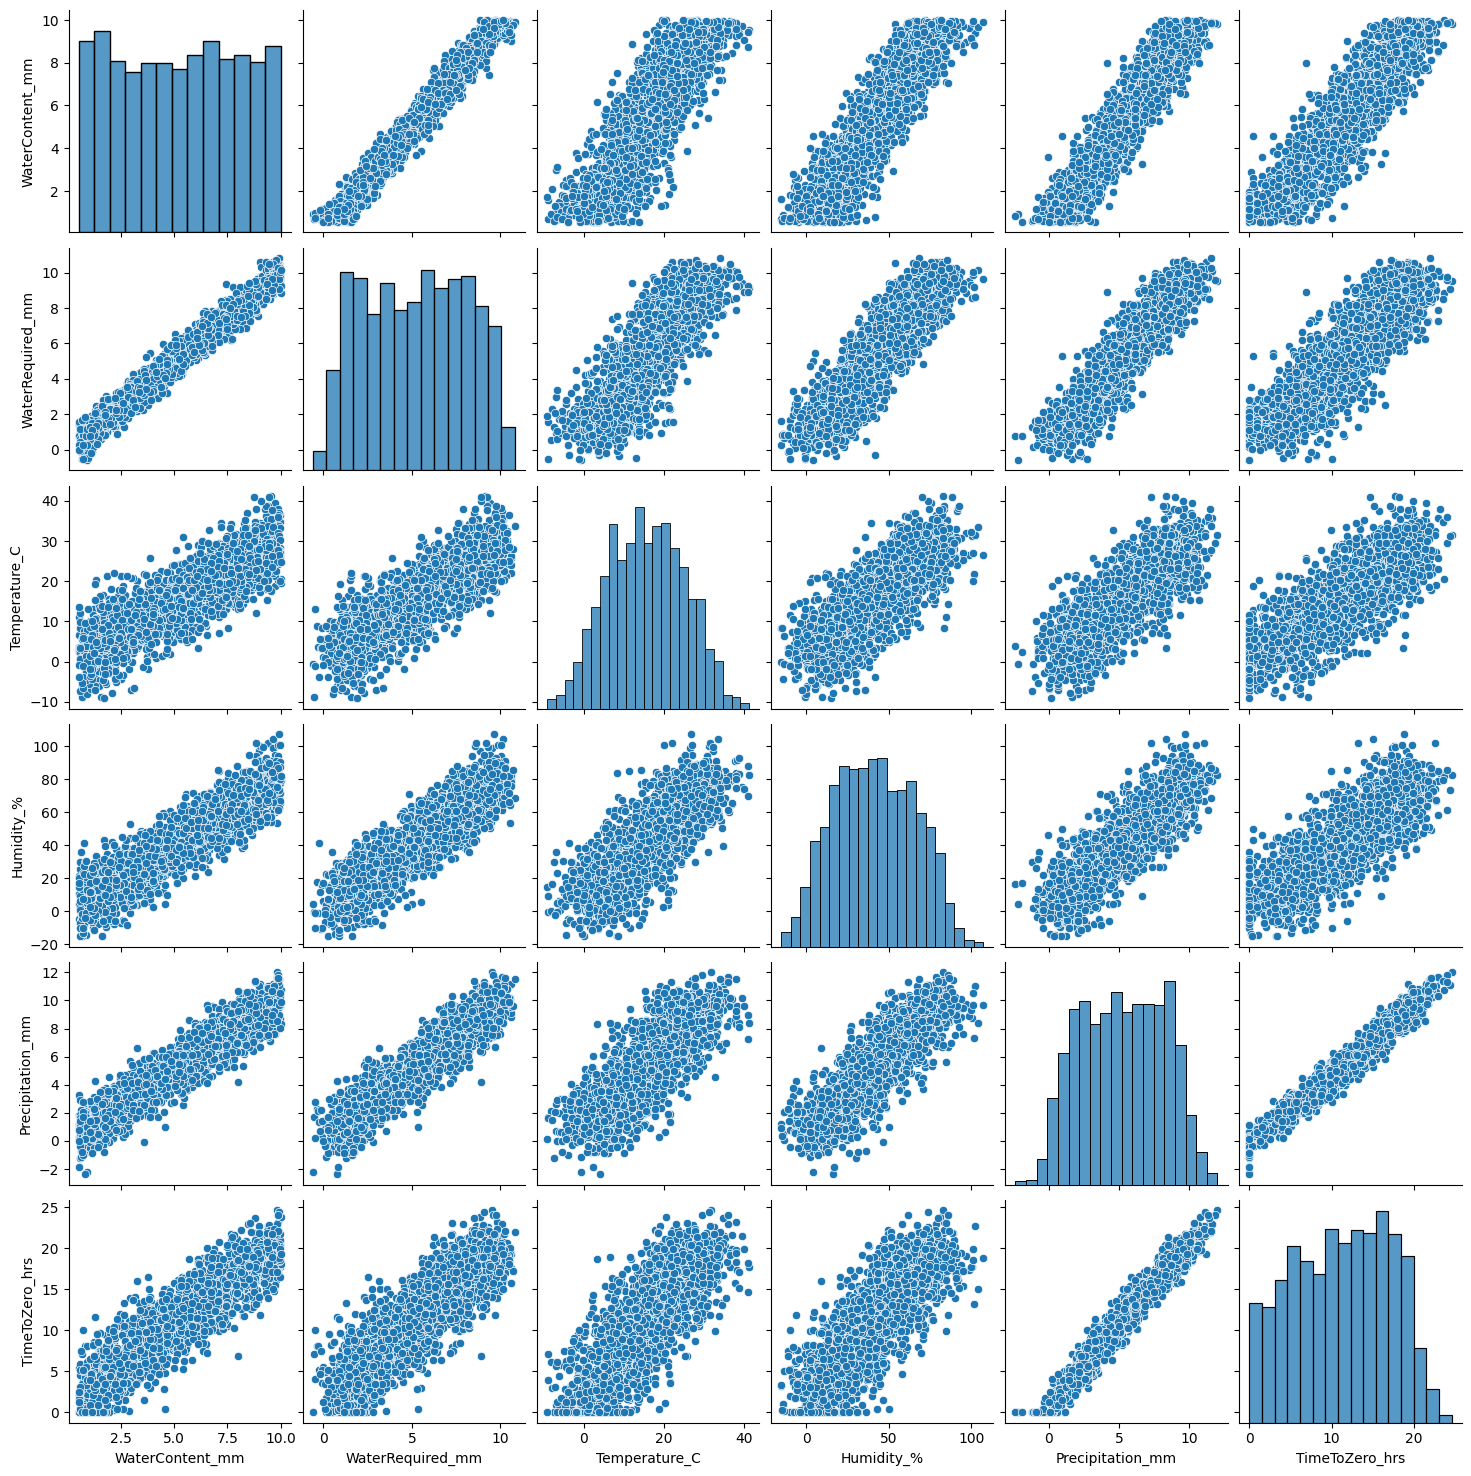

In [ ]:
import seaborn as sns

sns.pairplot(df_final)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = df_final

# Create a binary target by classifying 'TimeToZero_hrs' above or below a threshold
threshold = df['TimeToZero_hrs'].median()
df['TimeToZero_hrs_binary'] = (df['TimeToZero_hrs'] > threshold).astype(int)

# Features (X) and target (y)
X = df[['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']]
y = df['TimeToZero_hrs_binary']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

# Features (X) and target (y)
X = df[['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']]
y = df['TimeToZero_hrs']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Accuracy: 0.9950
Mean Squared Error: 0.2025
R-squared: 0.9943


Explained Variance by each component: [0.90355676 0.04725069 0.03116611 0.01528156 0.00274488]


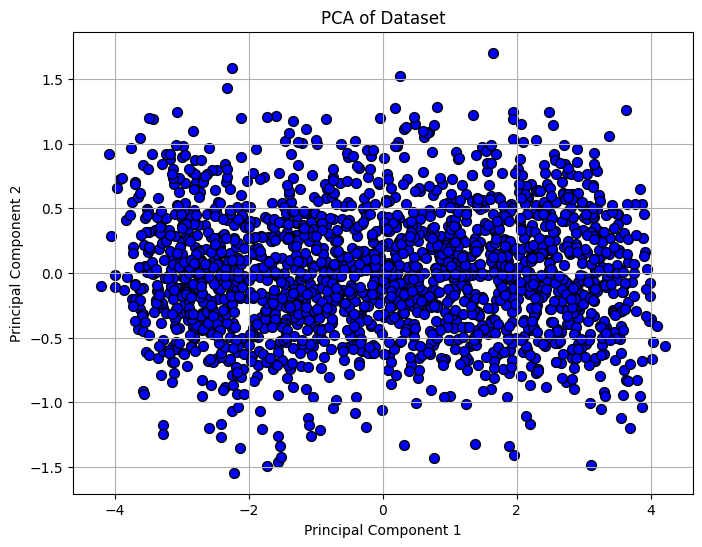

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset


# Select the features (excluding 'TimeToZero_hrs' as it's the target variable)
X = df_final[['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']]

# Standardize the data (PCA is affected by the scale of the features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 2 components for visualization, adjust accordingly
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by each component: {explained_variance}')

# Plot the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()



In [ ]:
covariance = np.cov(df['WaterContent_mm'], df['TimeToZero_hrs'], ddof=0)[0, 1]
correlation = df['WaterContent_mm'].corr(df['TimeToZero_hrs'])

print(f"Covariance between Column1 and Column6: {covariance}")
print(f"Correlation between Column1 and Column6: {correlation}")

Covariance between Column1 and Column2: 14.914759676613144
Correlation between Column1 and Column2: 0.9117074737627077


In [ ]:
covariance = np.cov(df['WaterRequired_mm'], df['TimeToZero_hrs'], ddof=0)[0, 1]
correlation = df['WaterRequired_mm'].corr(df['TimeToZero_hrs'])

print(f"Covariance between Column2 and Column6: {covariance}")
print(f"Correlation between Column2 and Column6: {correlation}")

Covariance between Column1 and Column2: 14.450583732036677
Correlation between Column1 and Column2: 0.8662143869550936


In [ ]:
covariance = np.cov(df['Temperature_C'], df['TimeToZero_hrs'], ddof=0)[0, 1]
correlation = df['Temperature_C'].corr(df['TimeToZero_hrs'])

print(f"Covariance between Column3 and Column6: {covariance}")
print(f"Correlation between Column3 and Column6: {correlation}")


Covariance between Column1 and Column2: 43.88282398304937
Correlation between Column1 and Column2: 0.7797554672260237


In [ ]:
covariance = np.cov(df['Humidity_%'], df['TimeToZero_hrs'], ddof=0)[0, 1]
correlation = df['Humidity_%'].corr(df['TimeToZero_hrs'])

print(f"Covariance between Column4 and Column6: {covariance}")
print(f"Correlation between Column4 and Column6: {correlation}")

Covariance between Column1 and Column2: 116.37109744400624
Correlation between Column1 and Column2: 0.8064010065946039


In [ ]:
covariance = np.cov(df['Precipitation_mm'], df['TimeToZero_hrs'], ddof=0)[0, 1]
correlation = df['Precipitation_mm'].corr(df['TimeToZero_hrs'])

print(f"Covariance between Column5 and Column6: {covariance}")
print(f"Correlation between Column5 and Column6: {correlation}")

Covariance between Column1 and Column2: 16.95942303582253
Correlation between Column1 and Column2: 0.9799368722048403


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Assuming df_final is your DataFrame
# Convert DataFrame to numpy arrays
X = df_final[['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']].values
y = df_final['TimeToZero_hrs'].values

# Initialize the model
model = XGBRegressor()

# Define the number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store the performance metrics for each fold
mse_scores = []
r2_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

# Print average metrics
print(f'Average Mean Squared Error: {np.mean(mse_scores)}')
print(f'Average R^2 Score: {np.mean(r2_scores)}')


Average Mean Squared Error: 0.2501978100532256
Average R^2 Score: 0.9928061403008062


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import zscore
from xgboost import XGBRegressor  # Import XGBRegressor

# Select numerical and categorical columns
numerical_cols = df_final.select_dtypes(include=[np.number]).columns
categorical_cols = df_final.select_dtypes(exclude=[np.number]).columns

# Detect and remove outliers in numerical columns using Z-score
df_final_numerical = df_final[numerical_cols]
df_final_numerical_zscores = df_final_numerical.apply(zscore)

# Filter out rows where any numerical feature has a Z-score greater than 3 or less than -3
df_final_numerical_no_outliers = df_final_numerical[(np.abs(df_final_numerical_zscores) < 3).all(axis=1)]

# Recombine with the original categorical columns
df_final = df_final_numerical_no_outliers.join(df_final[categorical_cols])

# Feature columns and target column
features = ['WaterContent_mm', 'WaterRequired_mm', 'Temperature_C', 'Humidity_%', 'Precipitation_mm']
target = 'TimeToZero_hrs'

# Prepare input features (X) and target variable (y)
X = df_final[features]
y = df_final[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the XGBRegressor model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Set appropriate objective
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

def predict_remaining_time(water_content, water_required, temperature, humidity, precipitation):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'WaterContent_mm': [water_content],
        'WaterRequired_mm': [water_required],
        'Temperature_C': [temperature],
        'Humidity_%': [humidity],
        'Precipitation_mm': [precipitation]
    })

    # Standardize the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict the remaining time
    remaining_time = model.predict(input_data_scaled)
    return remaining_time[0]

# Example prediction
remaining_time = predict_remaining_time(8.16, Irrigation_Water_Requirement, 24, 60, 0)
print(f"Predicted Remaining Time in Irrigation Cycle: {remaining_time} hours")

if remaining_time < 4:
    print('Irrigate now')
elif 4 < remaining_time < 6:
    print('Irrigate after 6 hours')
else:
    print('No need to irrigate right now')


Mean Squared Error: 0.26318656993771355
R^2 Score: 0.9925532267480501
Predicted Remaining Time in Irrigation Cycle: 3.8501811027526855 hours
Irrigate now


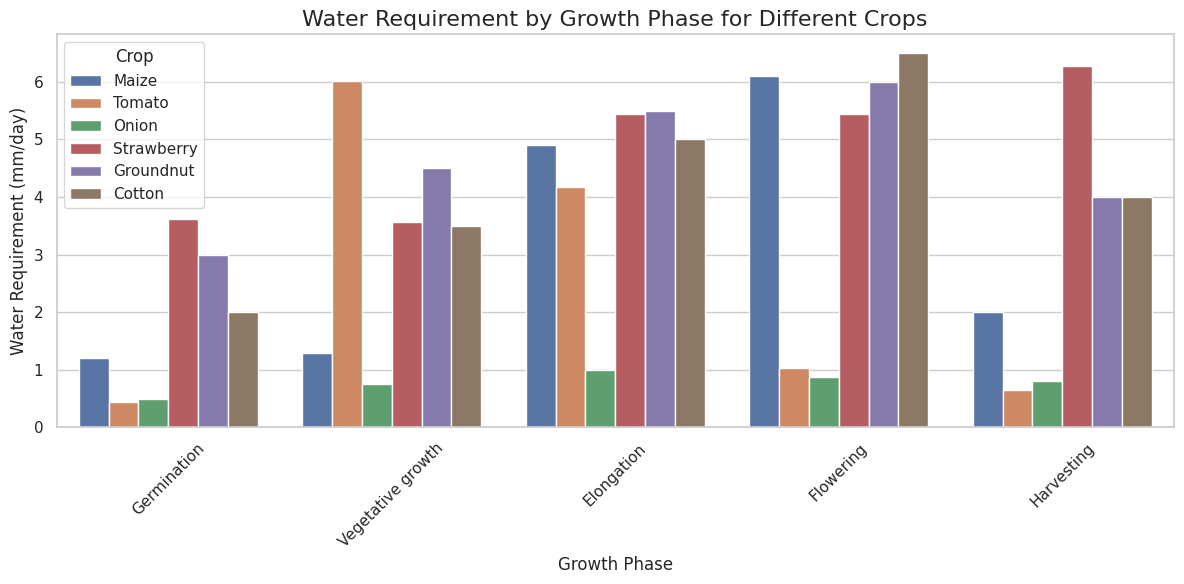

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove the unnamed column
#data_cleaned = df2.drop(columns=['Unnamed: 0'])

# Set plot aesthetics
sns.set(style="whitegrid")

# Create a barplot to visualize water requirements for different growth phases of each crop
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='Growth Phase', y='Water Requirement (mm/day)', hue='Crop')

# Set title and labels
plt.title('Water Requirement by Growth Phase for Different Crops', fontsize=16)
plt.xlabel('Growth Phase', fontsize=12)
plt.ylabel('Water Requirement (mm/day)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Crop')

# Display the plot
plt.tight_layout()
plt.show()
